# Install Library


In [47]:
# !pip install matplotlib pandas nltk textblob 
# !pip3 install googletrans==3..1.0a0
# !pip install textblob
# !pip install tweet-preprocessor
# !pip install sastrawi
# !pip install emoji
# !pip install PySastrawi
# !pip install anvil-uplink


# IMPORT LIBRARY


In [48]:
import os
import pandas as pd
import numpy as np
import tweepy
import csv
import re
import string
import preprocessor as p
import nltk
import datetime
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from preprocessor.api import clean, tokenize, parse
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import timedelta
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from flask import Flask, request, render_template
import pickle

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/reindrairawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/reindrairawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import anvil.server

# anvil.server.connect("WGFNWSGM5OLR5XPQ6AHS3ZXT-YOHIYFGWQO73MFAQ")
anvil.server.connect("YWAJF7OMEN3PLYJ7AR63G5GN-HQYXRN4WGKGCFFZQ")

# Crawling data tweet


In [50]:
api_key = "vdUPERoyGdSgyXkXO97M5fsdQ"
api_key_secret = "Tib5ZDQ6OORdMo8lyTwteTRl1Fx8gEq9GCZURPuQbJerIqEZhC"
access_token = "1519343221574615040-XUGEui3nxaeeaF6SlZdEOMPUazLzA3"
access_token_secret = "nP4YleEq7qwc0myDhHI19Wy3sDGWVcAYd1ZfxJvuitz3l"

In [51]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

/home/reindrairawan/.local/lib/python3.10/site-packages/tweepy/auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


In [52]:
# onsumer_key  = ''
# consumer_secret = ''
# auth = tweepy.AppAuthHandler('', '')

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# api = tweepy.API(auth)

topic = 'Kebakaran Hutan'

data = []
for tweet in tweepy.Cursor(api.search_tweets, q=topic).items(500):
    status = api.get_status(tweet.id, tweet_mode='extended')
    try:
        text = status.retweeted_status.full_text
    except AttributeError:
        text = status.full_text
    data.append([text, 1])

with open('dataset.csv', 'w') as csvfile:
    wr = csv.writer(csvfile)
    for d in data:
        wr.writerow(d)

/home/reindrairawan/.local/lib/python3.10/site-packages/anvil/_threaded_server.py:322: DeprecationWarning: notifyAll() is deprecated, use notify_all() instead
  waiting_for_calls.notifyAll()
/home/reindrairawan/.local/lib/python3.10/site-packages/anvil/_threaded_server.py:322: DeprecationWarning: notifyAll() is deprecated, use notify_all() instead
  waiting_for_calls.notifyAll()
/home/reindrairawan/.local/lib/python3.10/site-packages/anvil/_threaded_server.py:322: DeprecationWarning: notifyAll() is deprecated, use notify_all() instead
  waiting_for_calls.notifyAll()
/home/reindrairawan/.local/lib/python3.10/site-packages/anvil/_threaded_server.py:322: DeprecationWarning: notifyAll() is deprecated, use notify_all() instead
  waiting_for_calls.notifyAll()
/home/reindrairawan/.local/lib/python3.10/site-packages/anvil/_threaded_server.py:322: DeprecationWarning: notifyAll() is deprecated, use notify_all() instead
  waiting_for_calls.notifyAll()
/home/reindrairawan/.local/lib/python3.10/sit

In [96]:
data = pd.read_csv("dataset.csv",
                 names = [ "text", "label" ])
data

,text,label
0,@SantorinisSun Anomali iklim berdampak tidak b...,1
1,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1
2,#BHdunia Suhu di Sepanyol cecah 37 darjah Cels...,1
3,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1
4,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1
...,...,...
495,FLASH SALE 😍 AKU SUKA SEDEKAH. *Satu set isi 5...,1
496,FLASH SALE 😍 AKU SUKA SEDEKAH. *Satu set isi 5...,1
497,FLASH SALE 😍 AKU SUKA SEDEKAH. *Satu set isi 5...,1
498,FLASH SALE 😍 AKU SUKA SEDEKAH. *Satu set isi 5...,1


# Preprocessing


In [97]:
def casefolding(text):
    text = text.lower() # merubah bentuk menjadi lower case
    text = re.sub(r'\d+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]','',text) # menghapus karakter tanda baca
    text = text.strip()
    return text


data['processed'] = data['text'].apply(lambda x: casefolding(x))
data.head()

,text,label,processed
0,@SantorinisSun Anomali iklim berdampak tidak b...,1,santorinissun anomali iklim berdampak tidak ba...
1,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,bumi kian panas\n\nkalau korang selalu ikuti s...
2,#BHdunia Suhu di Sepanyol cecah 37 darjah Cels...,1,bhdunia suhu di sepanyol cecah darjah celsius...
3,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,bumi kian panas\n\nkalau korang selalu ikuti s...
4,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,bumi kian panas\n\nkalau korang selalu ikuti s...


In [100]:
# menormalkan text

pathdata = "/media/reindrairawan/New Volume/REPOSITORY/PYTHON/ProjectKuliah/DataScience/SentimenAnalisisKebakaranHutan/data/"

key_norm = pd.read_csv('data/clean_data.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm["singkat"] == word]['hasil'].values[0] if (key_norm["singkat"] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

# data['processed'] = data['text'].apply(lambda x: text_normalize(x))
# data.head()

In [101]:
# filtering menggukan nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stop_factory = stopwords.words('indonesian')
more_stopword = ['daring', 'online', 'pd']

def remove_stop_words(text):
    sw = stop_factory + more_stopword
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)


data['processed'] = data['text'].apply(lambda x: remove_stop_words(x))
data.head()

,text,label,processed
0,@SantorinisSun Anomali iklim berdampak tidak b...,1,@SantorinisSun Anomali iklim berdampak bangsa ...
1,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,BUMI KIAN PANAS? Kalau korang ikuti siaran ber...
2,#BHdunia Suhu di Sepanyol cecah 37 darjah Cels...,1,#BHdunia Suhu Sepanyol cecah 37 darjah Celsius...
3,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,BUMI KIAN PANAS? Kalau korang ikuti siaran ber...
4,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,BUMI KIAN PANAS? Kalau korang ikuti siaran ber...


In [102]:
# stemming menggunakan sastrawi 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

 
data['processed'] = data['text'].apply(lambda x: stemming(x))
data.head()  

,text,label,processed
0,@SantorinisSun Anomali iklim berdampak tidak b...,1,santorinissun anomali iklim dampak tidak baik ...
1,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,bumi kian panas kalau korang selalu ikut siar ...
2,#BHdunia Suhu di Sepanyol cecah 37 darjah Cels...,1,bhdunia suhu di sepanyol cecah 37 darjah celsi...
3,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,bumi kian panas kalau korang selalu ikut siar ...
4,BUMI KIAN PANAS?\n\nKalau korang selalu ikuti ...,1,bumi kian panas kalau korang selalu ikut siar ...


In [103]:
# Text Preprocessing Pipeline
def data_process(text):
    text = casefolding(text)
    # text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [104]:
import time

t1 = time.time()
data['text'] = data['text'].apply(data_process)
print('cleaning dataset elapsed time:', time.time() - t1, '\n')

cleaning dataset elapsed time: 1.1181814670562744 



In [123]:
data.to_csv(pathdata+'/clean_data.csv', encoding='utf-8')
data

,Unnamed: 0,text,neg,neu,pos,compound,comp_score
0,0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776,pos
1,1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000,neu
2,2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000,neu
3,3,https tco jgdymoippn,0.000,1.000,0.000,0.0000,neu
4,4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404,pos
5,5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000,neu
6,6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574,pos
7,7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249,pos


In [124]:
data.to_csv('tweet_bersih.csv',encoding='utf8',index=False)

# Translate to english

In [126]:
databersih = pd.read_csv('data/tweet_bersih.csv')
databersih.head(10)

,text,label,processed
0,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
1,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
2,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
3,bakar hutan maroko utara httpstcocbyzjmragh,1,bakar hutan di maroko utara https t co cbyzjmragh
4,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
5,bakar hutan maroko utara httpstcocbyzjmragh,1,bakar hutan di maroko utara https t co cbyzjmragh
6,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
7,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
8,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...
9,bakar hutan sebar prancis orang evakuasi https...,1,bakar hutan sebar di prancis 480 orang evakuas...


In [127]:
from googletrans import Translator
translator = Translator()

databersih['processed']
databersih['english'] = databersih['processed'].apply(translator.translate, src='id', dest='en').apply(getattr, args=('text',))
databersih

/home/reindrairawan/.local/lib/python3.10/site-packages/httpx/_config.py:156: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = ssl.SSLContext(ssl.PROTOCOL_TLS)
/home/reindrairawan/.local/lib/python3.10/site-packages/httpx/_config.py:159: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1
/home/reindrairawan/.local/lib/python3.10/site-packages/httpx/_config.py:160: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1_1


,text,label,processed,english
0,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
1,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
2,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
3,bakar hutan maroko utara httpstcocbyzjmragh,1,bakar hutan di maroko utara https t co cbyzjmragh,burn forest in northern morocco https t co cby...
4,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
5,bakar hutan maroko utara httpstcocbyzjmragh,1,bakar hutan di maroko utara https t co cbyzjmragh,burn forest in northern morocco https t co cby...
6,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
7,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
8,bumi kian panas korang ikut siar berita dunia ...,1,bumi kian panas kalau korang selalu ikut siar ...,The earth is getting hotter if you always foll...
9,bakar hutan sebar prancis orang evakuasi https...,1,bakar hutan sebar di prancis 480 orang evakuas...,forest fires spread in france 480 people evacu...


In [128]:
dataenglish = databersih['english']
dataenglish

0     The earth is getting hotter if you always foll...
1     The earth is getting hotter if you always foll...
2     The earth is getting hotter if you always foll...
3     burn forest in northern morocco https t co cby...
4     The earth is getting hotter if you always foll...
5     burn forest in northern morocco https t co cby...
6     The earth is getting hotter if you always foll...
7     The earth is getting hotter if you always foll...
8     The earth is getting hotter if you always foll...
9     forest fires spread in france 480 people evacu...
10                                 https tco jgdymoippn
11    I hope the people who belong to the sun will a...
12    This activity that took two days 13 14 07 2022...
13    klhk then directorate of forest and land fire ...
14    The earth is getting hotter if you always foll...
15    The earth is getting hotter if you always foll...
16    There are many strong indications that forest ...
17    The earth is getting hotter if you always 

In [ ]:
dataenglish.to_csv('datasetenglish.csv',encoding='utf8',index=False)

# Sentimen menggunakan textblob 

In [ ]:
df = pd.read_csv('datasetenglish.csv')
df.head()


,english
0,The earth is getting hotter if you always foll...
1,The earth is getting hotter if you always foll...
2,The earth is getting hotter if you always foll...
3,burn forest in northern morocco https t co cby...
4,The earth is getting hotter if you always foll...


In [ ]:

df['sentiment'] = df['english'].apply(lambda tweet: TextBlob(tweet).sentiment)
df

,english,sentiment
0,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
1,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
2,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
3,burn forest in northern morocco https t co cby...,"(0.0, 0.0)"
4,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
5,burn forest in northern morocco https t co cby...,"(0.0, 0.0)"
6,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
7,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
8,The earth is getting hotter if you always foll...,"(-0.049999999999999996, 0.5499999999999999)"
9,forest fires spread in france 480 people evacu...,"(0.0, 0.0)"


# Sentimen menggunakan SentimentIntensityAnalyzer

In [ ]:
df = pd.read_csv('datasetenglish.csv')
df.head()

,english
0,The earth is getting hotter if you always foll...
1,The earth is getting hotter if you always foll...
2,The earth is getting hotter if you always foll...
3,burn forest in northern morocco https t co cby...
4,The earth is getting hotter if you always foll...


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/reindrairawan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#untuk mengetahui 
sid = SentimentIntensityAnalyzer()

data = {
    interaction_id: sid.polarity_scores(
        ' '.join(df[df['english'] == interaction_id]['english'])
    )
    for interaction_id in df['english'].unique()
}


df = pd.DataFrame.from_dict(data, orient='index')
df.to_csv("sentimentcancelvssaves.csv")

In [ ]:
df = pd.read_csv('sentimentcancelvssaves.csv')
df.head(10)


,Unnamed: 0,neg,neu,pos,compound
0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776
1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000
2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000
3,https tco jgdymoippn,0.000,1.000,0.000,0.0000
4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404
5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000
6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574
7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249


In [122]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0.1 else ('neg' if c <0 else 'neu')) 
df 

,Unnamed: 0,neg,neu,pos,compound,comp_score
0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776,pos
1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000,neu
2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000,neu
3,https tco jgdymoippn,0.000,1.000,0.000,0.0000,neu
4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404,pos
5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000,neu
6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574,pos
7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249,pos


In [ ]:
df['comp_score'].value_counts()

pos    4
neu    4
Name: comp_score, dtype: int64

In [ ]:
df.columns = df.columns.str.replace('Unnamed: 0', 'text')
df

,text,neg,neu,pos,compound,comp_score
0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776,pos
1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000,neu
2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000,neu
3,https tco jgdymoippn,0.000,1.000,0.000,0.0000,neu
4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404,pos
5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000,neu
6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574,pos
7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249,pos


In [ ]:
df.to_csv("datatrain.csv")

In [ ]:
import time
analyzer = SentimentIntensityAnalyzer()

df = pd.read_csv('sentimentcancelvssaves.csv')
df.head()


pos_count = 0
pos_correct = 0

with open("sentimentcancelvssaves.csv","r") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if not vs['neg'] > 0.1:
            if vs['pos']-vs['neg'] > 0:
                pos_correct += 1
            pos_count +=1


neg_count = 0
neg_correct = 0

with open("sentimentcancelvssaves.csv","r") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if  vs['pos'] > 0.1:
            if vs['pos']-vs['neg'] <= 0:
                neg_correct += 1
            neg_count +=1

print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))



Positive accuracy = 40.0% via 10 samples
Negative accuracy = 0.0% via 2 samples


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
#random urutan dan split ke data training dan test
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('datatrain.csv')
data

,Unnamed: 0,text,neg,neu,pos,compound,comp_score
0,0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776,pos
1,1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000,neu
2,2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000,neu
3,3,https tco jgdymoippn,0.000,1.000,0.000,0.0000,neu
4,4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404,pos
5,5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000,neu
6,6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574,pos
7,7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249,pos


In [ ]:
x=data["text"]
y=data["comp_score"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13,
                                                    shuffle=True , stratify=y)
print(y.value_counts())

pos    4
neu    4
Name: comp_score, dtype: int64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipe = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),
                       ('classifier', MultinomialNB())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', MultinomialNB())])

akurasi 1.0
              precision    recall  f1-score   support

         neu       1.00      1.00      1.00         1
         pos       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



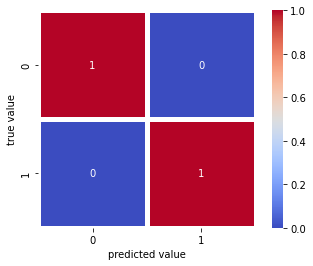

In [109]:
import warnings
warnings.filterwarnings('always') 
y_predict = pipe.predict(X_test)

akurasinbc =  accuracy_score(y_test,y_predict)*100

# akurasinbc = str(akurasinbc)

print("akurasi", accuracy_score(y_test,y_predict))
print(classification_report(y_test, y_predict))

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()


@anvil.server.callable()
def HasilAkurasiNBC(lokasi):


  return lokasi + str(akurasinbc)

# SVM 


In [110]:
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [111]:
datasvm = pd.read_csv('datatrain.csv')
datasvm

,Unnamed: 0,text,neg,neu,pos,compound,comp_score
0,0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776,pos
1,1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000,neu
2,2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000,neu
3,3,https tco jgdymoippn,0.000,1.000,0.000,0.0000,neu
4,4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404,pos
5,5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000,neu
6,6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574,pos
7,7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249,pos


pos    4
neu    4
Name: comp_score, dtype: int64


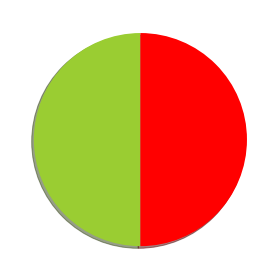

In [112]:
temp = datasvm['comp_score'].value_counts()
labels = datasvm['comp_score']
colors = ['yellowgreen','red', 'gold']
pathches, texts = plt.pie(temp, colors = colors, shadow = True, startangle=90, pctdistance=1.1, labeldistance=1.2)

# plt.legend(pathches, labels, loc='best')
plt.fignum_exists('equal')
plt.tight_layout()
print(labels.value_counts())
plt.show()


In [113]:
from sklearn.model_selection import train_test_split as tts
# SVM = svm.SVC(C=1.0, kernel='linear', degree=3,  gamma='scale')

vec = TfidfVectorizer(lowercase=True)
X = vec.fit_transform(datasvm['text'])

X_tr, X_tst, y_tr, y_tst = tts(X, labels, test_size=0.3,random_state=109)
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale')
clf.fit(X_tr, y_tr)



SVC(kernel='linear')

hasil sentimen neu    2
pos    1
Name: comp_score, dtype: int64


hasil SVM ['pos' 'pos' 'pos']


akurasi 33.33333333333333


              precision    recall  f1-score   support

         neu       0.00      0.00      0.00         2
         pos       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/home/reindrairawan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/reindrairawan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/reindrairawan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


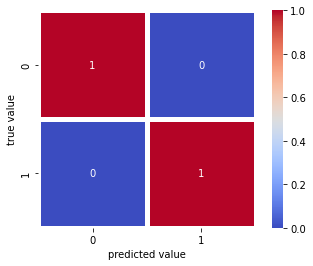

In [114]:


from sklearn import metrics
import warnings
warnings.filterwarnings('always') 
# print("Accuracy:",metrics.accuracy_score(y_tst, y_pr))

predict = clf.predict(X_tst)
# print("hasil sentimen", y_tst)
print("hasil sentimen", y_tst.value_counts())
print("\n")
print("hasil SVM",predict)
# print("hasil SVM",y_pr)
print("\n")
print("akurasi", accuracy_score(y_tst,predict)*100)

akurasisvm = accuracy_score(y_tst,predict)*100
# akurasisvm = str(akurasisvm)

print("\n")
print(classification_report(y_tst,predict))

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()




@anvil.server.callable()
def HasilAkurasiSVM(lokasi):


  return lokasi + str(akurasisvm)

# Random Forest

In [116]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [117]:
data = pd.read_csv('datatrain.csv')
data

,Unnamed: 0,text,neg,neu,pos,compound,comp_score
0,0,The earth is getting hotter if you always foll...,0.000,0.955,0.045,0.9776,pos
1,1,burn forest in northern morocco https t co cby...,0.000,1.000,0.000,0.0000,neu
2,2,forest fires spread in france 480 people evacu...,0.000,1.000,0.000,0.0000,neu
3,3,https tco jgdymoippn,0.000,1.000,0.000,0.0000,neu
4,4,I hope the people who belong to the sun will a...,0.000,0.903,0.097,0.4404,pos
5,5,This activity that took two days 13 14 07 2022...,0.000,1.000,0.000,0.0000,neu
6,6,klhk then directorate of forest and land fire ...,0.050,0.826,0.124,0.5574,pos
7,7,There are many strong indications that forest ...,0.043,0.820,0.137,0.6249,pos


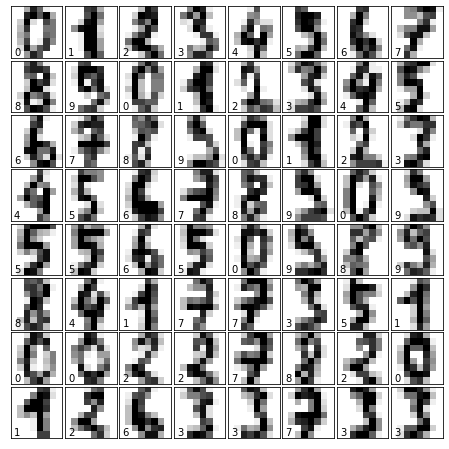

In [118]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

model=RandomForestClassifier(n_estimators=5, max_depth=3)

y=data["comp_score"]
# encoder = LabelEncoder()
# XX = encoder.fit_transform(x)
# y_test = encoder.fit_transform(y_test)

vec = TfidfVectorizer(lowercase=True)
X = vec.fit_transform(data['text'])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=23,shuffle=True , stratify=y)
# model = RandomForestClassifier(n_estimators=1000)
# model.fit(Xtrain, ytrain)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred

/home/reindrairawan/.local/lib/python3.10/site-packages/anvil/_threaded_server.py:322: DeprecationWarning: notifyAll() is deprecated, use notify_all() instead
  waiting_for_calls.notifyAll()


array(['pos', 'neu'], dtype=object)

In [120]:
from sklearn import metrics
import warnings
warnings.filterwarnings('always') 

print("Accuracy RFC:",metrics.accuracy_score(ytest, ypred))
print(metrics.confusion_matrix(ytest, ypred))
print(metrics.classification_report(ypred, ytest))

nilaiakurasi = metrics.accuracy_score(ytest, ypred)
print(nilaiakurasi)
# nilaiakurasi = str(nilaiakurasi)
print("nilai string", nilaiakurasi)



@anvil.server.callable()
def HasilAkurasiRF(lokasi):


  return lokasi + str(nilaiakurasi)

Accuracy RFC: 0.0
[[0 1]
 [1 0]]
              precision    recall  f1-score   support

         neu       0.00      0.00      0.00       1.0
         pos       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

0.0
nilai string 0.0


In [121]:
app = Flask(__name__)

model_file = open('models.pkl', 'rb')
model = pickle.load(model_file, encoding='bytes')

@app.route('/')
def index():
    return render_template('index.html', insurance_cost=0)

@app.route('/predict', methods=['POST'])
def predict():
    '''
    Predict the insurance cost based on user inputs
    and render the result to the html page
    '''
    age, sex, smoker = [x for x in request.form.values()]

    data = []

    data.append(int(age))
    if sex == 'Laki-laki':
        data.extend([0, 1])
    else:
        data.extend([1, 0])

    if smoker == 'Ya':
        data.extend([0, 1])
    else:
        data.extend([1, 0])
    
    prediction = model.predict([data])
    output = round(prediction[0], 2)

    return render_template('index.html', insurance_cost=output, age=age, sex=sex, smoker=smoker)


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


/tmp/ipykernel_12747/1063865912.py:3: ResourceWarning: unclosed file <_io.BufferedReader name='models.pkl'>
  model_file = open('models.pkl', 'rb')
/home/reindrairawan/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.24.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 